In [1]:
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()

import tensorflow_probability as tfp
tfd = tfp.distributions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [3]:
from utils import *

# Data Loading

In [4]:
theta_0_range = np.arange(0.5, 1.75, 0.25)
omega_0_range = np.arange(0.5, 1.75, 0.25)
m_range = np.arange(1, 3, 1)
l_range = np.arange(1, 3, 1)
N_samples = 500
ti = 0.01
X, Y = approximation_dataset_generator(theta_0_range, omega_0_range, m_range, l_range, 10, ti, N_samples)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, train_size=0.75)

In [7]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((37500, 6), (12500, 6), (37500,), (12500,))

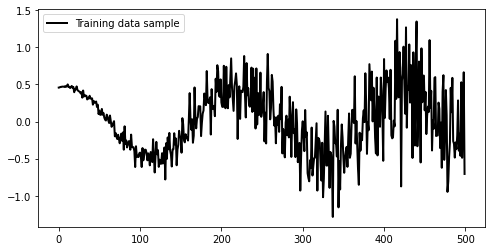

In [8]:
plt.figure(figsize = (8, 4))
plt.plot(Y[:N_samples], label = 'Training data sample', color = 'black', lw=2)
plt.legend()
plt.show()

In [9]:
# training params
N_epochs = 20
lr = 0.01

# Regular ML

In [10]:
# Build model.
model_static = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear'),
])

# Do inference.
model_static.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss='mse')
model_static.fit(X_train, Y_train, 
          validation_data = (X_test, Y_test),
          epochs=N_epochs, verbose=True, 
          callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/20
1172/1172 [==============================] - 4s 3ms/step - loss: 0.6731 - val_loss: 0.3190
Epoch 2/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.2326 - val_loss: 0.1199
Epoch 3/20
1172/1172 [==============================] - 2s 1ms/step - loss: 0.1338 - val_loss: 0.1259
Epoch 4/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1271 - val_loss: 0.1205
Epoch 5/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1315 - val_loss: 0.1252


In [11]:
pred = model_static.predict(X)
r2_score(Y, pred), mean_squared_error(Y, pred), mean_absolute_error(Y, pred)

(0.8486307144998102, 0.12535480762263837, 0.26251209421301597)

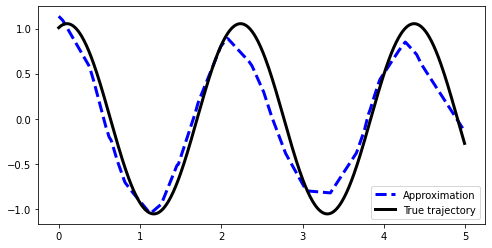

In [12]:
theta_0_i, omega_0_i, m, g, l = 1, 1, 1, 10, 1

t, v = pendulum_generation(theta_0_i, omega_0_i, ti, m, g, l, N_samples)
# theta_0_i, omega_0_i, ti, m, g, l, N
t_ml = np.arange(0, N_samples * ti, ti)
ml_input = np.array([[theta_0_i, omega_0_i, ti_ml, m, g, l] for i, ti_ml in enumerate(t_ml)])
ml_output = model_static.predict(ml_input)
    
plt.figure(figsize = (8, 4))
plt.plot(t_ml, ml_output, color = 'blue', lw = 3, ls = '--', label = 'Approximation')
plt.plot(t, v, color = 'black', lw = 3, label = 'True trajectory')
plt.legend()
plt.show()

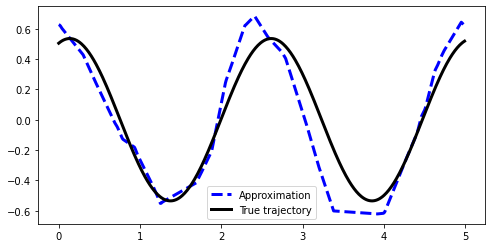

In [13]:
theta_0_i, omega_0_i, m, g, l = 0.5, 0.5, 1.5, 10, 1.5

t, v = pendulum_generation(theta_0_i, omega_0_i, ti, m, g, l, N_samples)
# theta_0_i, omega_0_i, ti, m, g, l, N
t_ml = np.arange(0, N_samples * ti, ti)
ml_input = np.array([[theta_0_i, omega_0_i, ti_ml, m, g, l] for i, ti_ml in enumerate(t_ml)])
ml_output = model_static.predict(ml_input)
    
plt.figure(figsize = (8, 4))
plt.plot(t_ml, ml_output, color = 'blue', lw = 3, ls = '--', label = 'Approximation')
plt.plot(t, v, color = 'black', lw = 3, label = 'True trajectory')
plt.legend()
plt.show()

# Bayesian Output Mean Only

In [14]:
SD = 0.1

In [15]:
# Build model.
model_mean = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu'), 
    tf.keras.layers.Dense(20, activation='relu'), 
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1),
    tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=SD)),
])

# Do inference.
model_mean.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss='mse')
model_mean.fit(X_train, Y_train, 
          validation_data = (X_test, Y_test),
          epochs=N_epochs, verbose=True, 
          callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/20
1172/1172 [==============================] - 3s 2ms/step - loss: 0.6206 - val_loss: 0.1864
Epoch 2/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1939 - val_loss: 0.1380
Epoch 3/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1615 - val_loss: 0.1921
Epoch 4/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1635 - val_loss: 0.1352
Epoch 5/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1531 - val_loss: 0.1629
Epoch 6/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1548 - val_loss: 0.1505
Epoch 7/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1391 - val_loss: 0.1319
Epoch 8/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1360 - val_loss: 0.1177
Epoch 9/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1331 - val_loss: 0.1531
Epoch 10/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.130

In [16]:
print(r2_score(Y, model_mean(X).mean()), 
      mean_squared_error(Y, model_mean(X).mean()), 
      mean_absolute_error(Y, model_mean(X).mean()))

0.8672909362220387 0.10990155040168918 0.24904337683636257


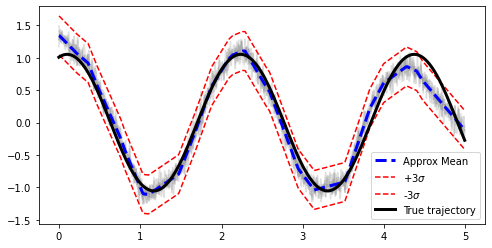

In [17]:
theta_0_i, omega_0_i, m, g, l = 1, 1, 1, 10, 1

t, v = pendulum_generation(theta_0_i, omega_0_i, ti, m, g, l, N_samples)
# theta_0_i, omega_0_i, ti, m, g, l, N
t_ml = np.arange(0, N_samples * ti, ti)
ml_input = np.array([[theta_0_i, omega_0_i, ti_ml, m, g, l] for i, ti_ml in enumerate(t_ml)])

sample = model_mean(ml_input).sample(5).numpy()
ml_output_mean = model_mean(ml_input).mean().numpy()
ml_output_std = model_mean(ml_input).stddev().numpy()

plt.figure(figsize = (8, 4))
plt.plot(t_ml, sample.squeeze(-1).T, color = 'grey', alpha = 0.25)

plt.plot(t_ml, ml_output_mean, color = 'blue', lw = 3, ls = '--', label = 'Approx Mean')
plt.plot(t_ml, ml_output_mean + 3 * ml_output_std, color = 'red', ls = '--', label = '+3$\sigma$')
plt.plot(t_ml, ml_output_mean - 3 * ml_output_std, color = 'red', ls = '--', label = '-3$\sigma$')

plt.plot(t, v, color = 'black', lw = 3, label = 'True trajectory')
plt.legend()
plt.show()

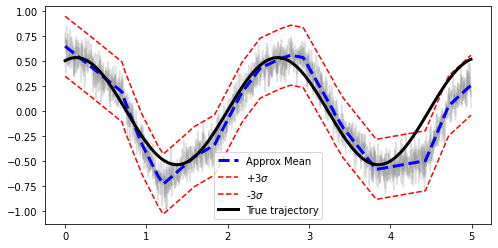

In [18]:
theta_0_i, omega_0_i, m, g, l = 0.5, 0.5, 1.5, 10, 1.5

t, v = pendulum_generation(theta_0_i, omega_0_i, ti, m, g, l, N_samples)
# theta_0_i, omega_0_i, ti, m, g, l, N
t_ml = np.arange(0, N_samples * ti, ti)
ml_input = np.array([[theta_0_i, omega_0_i, ti_ml, m, g, l] for i, ti_ml in enumerate(t_ml)])

sample = model_mean(ml_input).sample(5).numpy()
ml_output_mean = model_mean(ml_input).mean().numpy()
ml_output_std = model_mean(ml_input).stddev().numpy()

plt.figure(figsize = (8, 4))
plt.plot(t_ml, sample.squeeze(-1).T, color = 'grey', alpha = 0.25)

plt.plot(t_ml, ml_output_mean, color = 'blue', lw = 3, ls = '--', label = 'Approx Mean')
plt.plot(t_ml, ml_output_mean + 3 * ml_output_std, color = 'red', ls = '--', label = '+3$\sigma$')
plt.plot(t_ml, ml_output_mean - 3 * ml_output_std, color = 'red', ls = '--', label = '-3$\sigma$')

plt.plot(t, v, color = 'black', lw = 3, label = 'True trajectory')
plt.legend()
plt.show()

# Bayesian Output Mean + SD

In [19]:
def normal_sp(params): 
      return tfd.Normal(
          loc=params[..., :1], 
          scale= SD + tf.math.softplus(params[..., 1:])
      ) # both parameters are learnable


# Build model.
model_mean_sd = tf.keras.Sequential([

    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),

    tf.keras.layers.Dense(2),
    tfp.layers.DistributionLambda(normal_sp),

    ])

# Do inference.
model_mean_sd.compile(optimizer=tf.optimizers.Adam(learning_rate=lr), loss='mse')
model_mean_sd.fit(X_train, Y_train, 
          validation_data = (X_test, Y_test),
          epochs=N_epochs, verbose=True, 
          callbacks = [tf.keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/20
1172/1172 [==============================] - 3s 2ms/step - loss: 0.6159 - val_loss: 0.1968
Epoch 2/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.2020 - val_loss: 0.2415
Epoch 3/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1726 - val_loss: 0.2018
Epoch 4/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1637 - val_loss: 0.1815
Epoch 5/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1589 - val_loss: 0.1392
Epoch 6/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1563 - val_loss: 0.1338
Epoch 7/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1536 - val_loss: 0.1546
Epoch 8/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1462 - val_loss: 0.1812
Epoch 9/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.1401 - val_loss: 0.1323
Epoch 10/20
1172/1172 [==============================] - 2s 2ms/step - loss: 0.135

In [20]:
print(r2_score(Y, model_mean_sd(X).mean()), 
      mean_squared_error(Y, model_mean_sd(X).mean()), 
      mean_absolute_error(Y, model_mean_sd(X).mean()))

0.8643191748540162 0.11236258186760291 0.24489087728125614


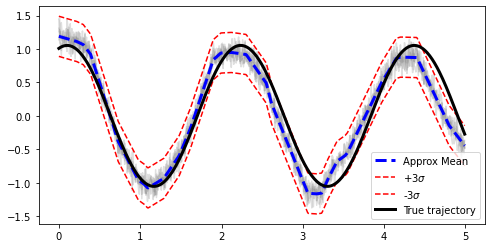

In [21]:
theta_0_i, omega_0_i, m, g, l = 1, 1, 1, 10, 1

t, v = pendulum_generation(theta_0_i, omega_0_i, ti, m, g, l, N_samples)
# theta_0_i, omega_0_i, ti, m, g, l, N
t_ml = np.arange(0, N_samples * ti, ti)
ml_input = np.array([[theta_0_i, omega_0_i, ti_ml, m, g, l] for i, ti_ml in enumerate(t_ml)])

sample = model_mean_sd(ml_input).sample(5).numpy()
ml_output_mean = model_mean_sd(ml_input).mean().numpy()
ml_output_std = model_mean_sd(ml_input).stddev().numpy()

plt.figure(figsize = (8, 4))
plt.plot(t_ml, sample.squeeze(-1).T, color = 'grey', alpha = 0.25)

plt.plot(t_ml, ml_output_mean, color = 'blue', lw = 3, ls = '--', label = 'Approx Mean')
plt.plot(t_ml, ml_output_mean + 3 * ml_output_std, color = 'red', ls = '--', label = '+3$\sigma$')
plt.plot(t_ml, ml_output_mean - 3 * ml_output_std, color = 'red', ls = '--', label = '-3$\sigma$')

plt.plot(t, v, color = 'black', lw = 3, label = 'True trajectory')
plt.legend()
plt.show()

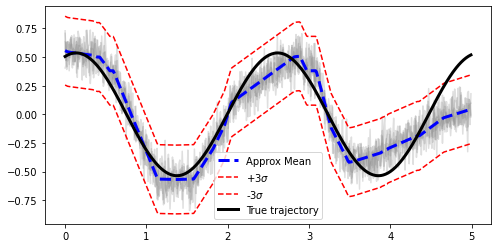

In [22]:
theta_0_i, omega_0_i, m, g, l = 0.5, 0.5, 1.5, 10, 1.5

t, v = pendulum_generation(theta_0_i, omega_0_i, ti, m, g, l, N_samples)
# theta_0_i, omega_0_i, ti, m, g, l, N
t_ml = np.arange(0, N_samples * ti, ti)
ml_input = np.array([[theta_0_i, omega_0_i, ti_ml, m, g, l] for i, ti_ml in enumerate(t_ml)])

sample = model_mean_sd(ml_input).sample(5).numpy()
ml_output_mean = model_mean_sd(ml_input).mean().numpy()
ml_output_std = model_mean_sd(ml_input).stddev().numpy()

plt.figure(figsize = (8, 4))
plt.plot(t_ml, sample.squeeze(-1).T, color = 'grey', alpha = 0.25)

plt.plot(t_ml, ml_output_mean, color = 'blue', lw = 3, ls = '--', label = 'Approx Mean')
plt.plot(t_ml, ml_output_mean + 3 * ml_output_std, color = 'red', ls = '--', label = '+3$\sigma$')
plt.plot(t_ml, ml_output_mean - 3 * ml_output_std, color = 'red', ls = '--', label = '-3$\sigma$')

plt.plot(t, v, color = 'black', lw = 3, label = 'True trajectory')
plt.legend()
plt.show()